In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial
%matplotlib notebook

In [2]:
def eval_beta(mu, a=.1, b=.1):
    coefficient = gamma(a+b) / (gamma(a) + gamma(b))
    return mu**(a-1) * (1-mu)**(b-1) * coefficient

In [3]:
mus = np.linspace(0, 1, 100)

def plot_beta_distribution(a, b):
    plt.plot(mus, eval_beta(mus, a=a, b=b))
    plt.title('a={}, b={}'.format(a,b))


/Users/jessegeerts/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


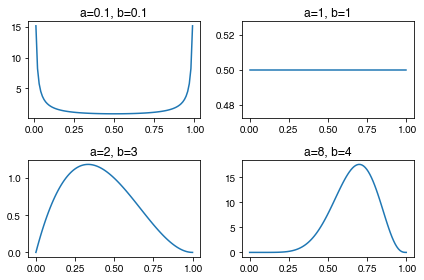

In [4]:
fig, axs = plt.subplots(2,2)
plt.sca(axs[0,0])
plot_beta_distribution(.1, .1)

plt.sca(axs[0,1])
plot_beta_distribution(1, 1)

plt.sca(axs[1,0])
plot_beta_distribution(2, 3)

plt.sca(axs[1,1])
plot_beta_distribution(8, 4)

plt.tight_layout()



In [5]:
def binom_likelihood_function(m, mu, N):
    n_over_m = factorial(N) / (factorial(N-m) * factorial(m))
    return mu**m * (1-mu)**(N-m) * n_over_m

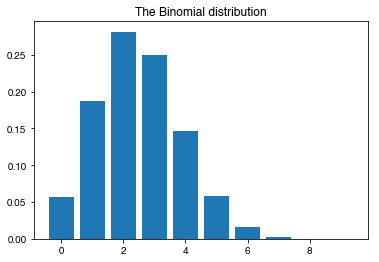

In [6]:
ems = np.arange(10)

plt.bar(ems, binom_likelihood_function(ems, .25, 10))
plt.title('The Binomial distribution')

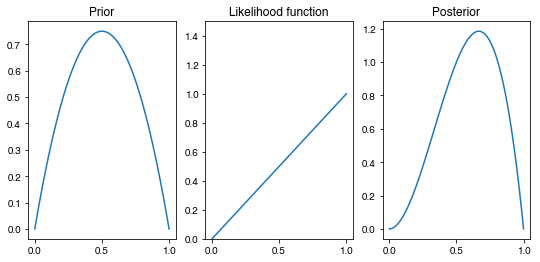

In [7]:
# Plot the likelihood function after seeing one observation 
fig, axs = plt.subplots(1,3, figsize=(9, 4))

a = 2
b = 2

plt.sca(axs[0])
plot_beta_distribution(a, b)
plt.title('Prior')

plt.sca(axs[1])
plt.plot(mus, binom_likelihood_function(1, mus, 1))
plt.ylim([0,1.5])
plt.title('Likelihood function')
a += 1

plt.sca(axs[2])
plot_beta_distribution(a, b)
plt.title('Posterior')



# Bayesian Q learning using beta distributions as conjugate priors 

In [8]:
from scipy.stats import beta

In [9]:
predecessor = beta(2, 2)

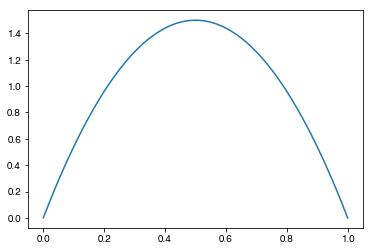

In [10]:
xs = np.linspace(0, 1, 100)

plt.plot(xs, predecessor.pdf(xs))

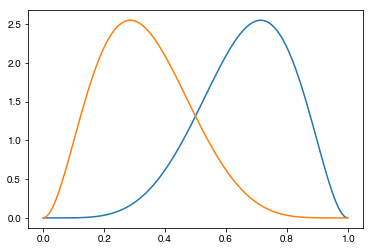

In [11]:
successor_1 = beta(6, 3)
successor_2 = beta(3, 6)

plt.plot(xs, successor_1.pdf(xs))
plt.plot(xs, successor_2.pdf(xs))

In [12]:
# calculate posterior mean and variance 
posterior1_mean = (predecessor.args[0] + successor_1.mean() ) / (predecessor.args[0] + predecessor.args[1] + 1)

pre_a = predecessor.args[0]
pre_b = predecessor.args[1]
posterior1_var = 1/ ((pre_a+pre_b+2) * (pre_a+pre_b+1)) * (pre_a**2 + pre_a + successor_1.moment(2) + (2 * pre_a+1) * successor_1.moment(1) ) - posterior1_mean**2

In [13]:
# get a and b from mean and variance 

posterior1_a = ((1-posterior1_mean) / posterior1_var - 1 / posterior1_mean) * posterior1_mean**2 
posterior1_b = posterior1_a * (1/ posterior1_mean - 1)

In [14]:
# Now the same for the other successor state


In [15]:
# calculate posterior mean and variance 
posterior2_mean = (predecessor.args[0] + successor_2.mean() ) / (predecessor.args[0] + predecessor.args[1] + 1)

pre_a = predecessor.args[0]
pre_b = predecessor.args[1]
posterior2_var = 1/ ((pre_a+pre_b+2) * (pre_a+pre_b+1)) * (pre_a**2 + pre_a + successor_2.moment(2) + (2 * pre_a+1) * successor_2.moment(1) ) - posterior2_mean**2

In [16]:
# get a and b from mean and variance 

posterior2_a = ((1-posterior2_mean) / posterior2_var - 1 / posterior2_mean) * posterior2_mean**2 
posterior2_b = posterior2_a * (1/ posterior2_mean - 1)

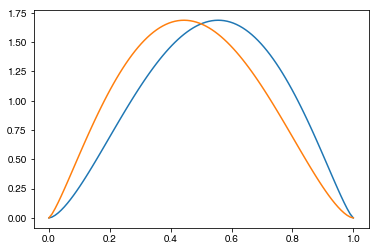

In [17]:
posterior_1 = beta(posterior1_a, posterior1_b)
posterior_2 = beta(posterior2_a, posterior2_b)

plt.plot(xs, posterior_1.pdf(xs))
plt.plot(xs, posterior_2.pdf(xs))

# The normal-gamma distribution: a conjugate prior for gaussians with unknown mean and variance

In [19]:
import rpy2.robjects as robjects

In [21]:
robjects.

rpy2.robjects.functions.Function